In [13]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [8]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 1s 0us/step


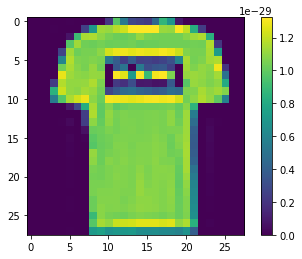

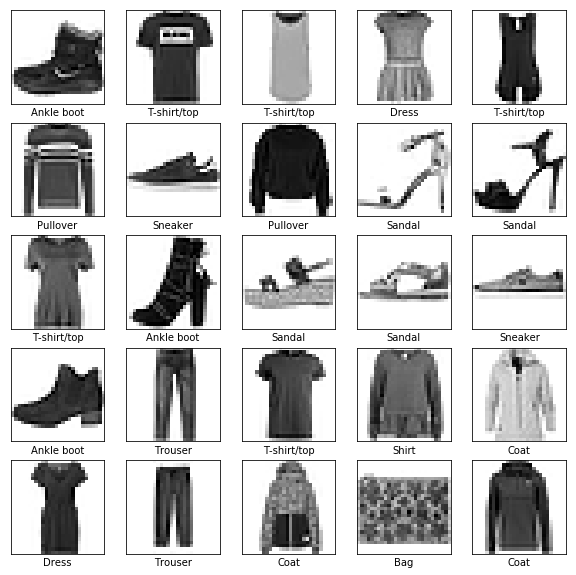

Epoch 1/30
60000/60000 [==============================] - 10s 166us/sample - loss: 2.3028 - acc: 0.0989
Epoch 2/30
60000/60000 [==============================] - 9s 157us/sample - loss: 2.3028 - acc: 0.0990
Epoch 3/30
60000/60000 [==============================] - 10s 161us/sample - loss: 2.3027 - acc: 0.0991
Epoch 4/30
60000/60000 [==============================] - 10s 160us/sample - loss: 2.3028 - acc: 0.1006
Epoch 5/30
60000/60000 [==============================] - 10s 159us/sample - loss: 2.3028 - acc: 0.1002
Epoch 6/30
60000/60000 [==============================] - 10s 159us/sample - loss: 2.3028 - acc: 0.0968
Epoch 7/30
60000/60000 [==============================] - 10s 161us/sample - loss: 2.3028 - acc: 0.1000
Epoch 8/30
60000/60000 [==============================] - 10s 164us/sample - loss: 2.3028 - acc: 0.0977
Epoch 9/30
60000/60000 [==============================] - 10s 164us/sample - loss: 2.3028 - acc: 0.0984
Epoch 10/30
60000/60000 [==============================] - 10s 16

In [48]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

train_images = train_images / 255.0

test_images = test_images / 255.0

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(108, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(train_images, train_labels, epochs=30)


test_loss, test_acc = model.evaluate(test_images, test_labels)


print('Test accuracy:', test_acc)

In [53]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


In [54]:
predictions = model.predict(test_images)


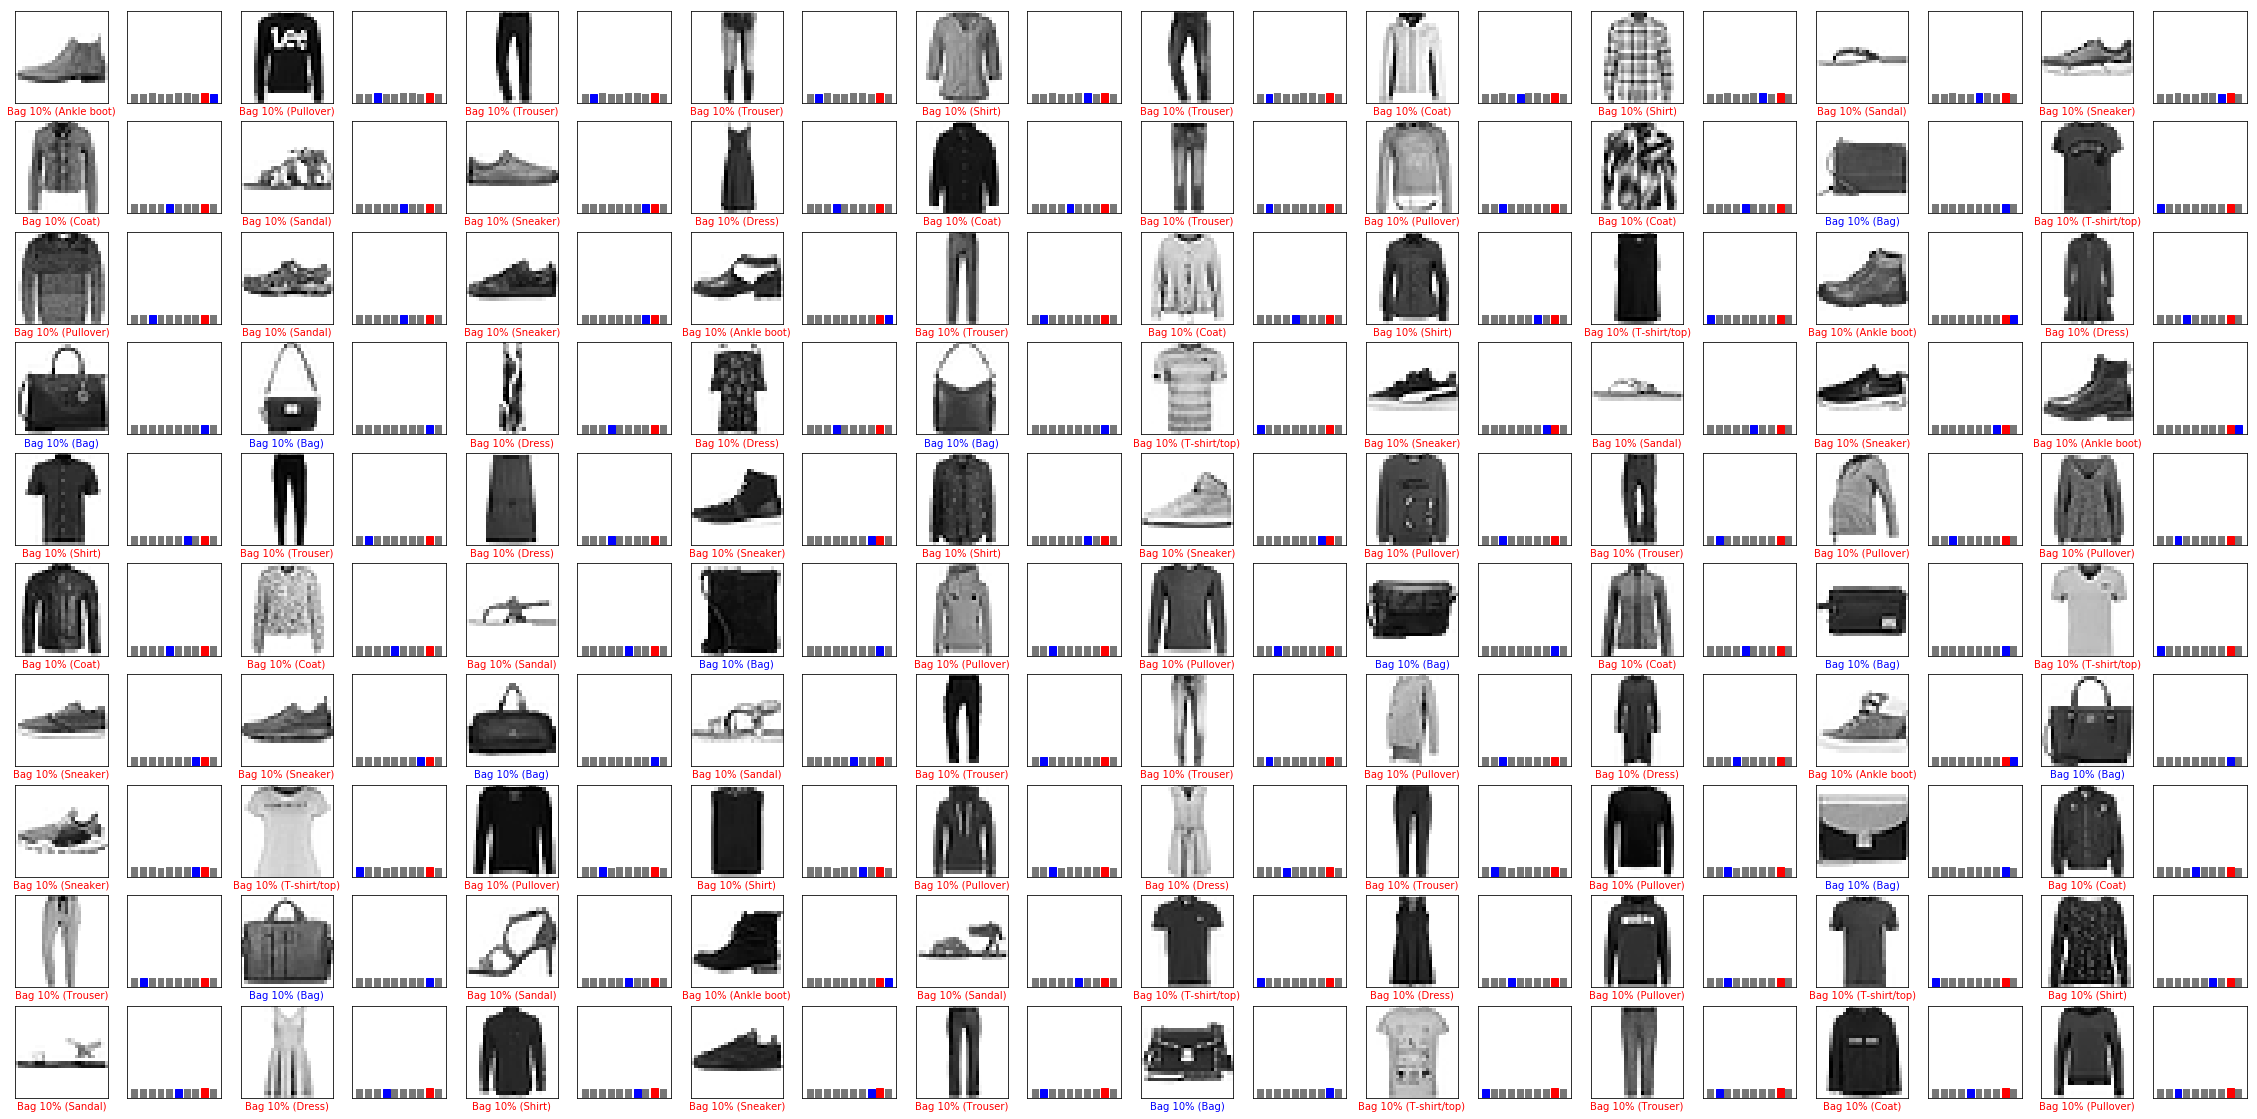

In [55]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 10
num_cols = 10
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()
